# Customer Churn Prediction Analysis

### Description

Name : K.S, SUH 
Date : 2017.08.05 KST(seoul) 08:32 AM

Purpose: Tech-challenges for application for BNK
    
Customer churn also known as Customer turnover occurs when customers are stop doing business with a company or service from bank. Therefore, Understanding what keeps customer engageing is incredibly valuable for BNK at the moment. In the meantime,I have tried to find relevant data set about Customer churn in Banking but I could not find any publicly opened data set in banking. so, I choose a similar dataset(a longstanding telecom data )

In this notebook, you will explore a simple case study to show how Python and its scientific libraries can be used to predict churn

## PART 1. 

### Load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('churn.csv')

In [3]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [4]:
df['Churn?'].head()

0    False.
1    False.
2    False.
3    False.
4    False.
Name: Churn?, dtype: object

In [5]:
df.shape

(3333, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


In [7]:
df.isnull().values.any()

False

#  Preprocessing Data

-  Munging

-  Transformation

-  Reduction by PCA

### Munging

In [8]:
df_features, df_labels = df.drop(['Churn?'], axis=1), df['Churn?']

In [9]:
y = np.where(df_labels == 'True.',1,0)

In [10]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
df_features = df_features.drop(['State','Area Code','Phone'],axis=1)

In [12]:
boolean_cols = ["Int'l Plan","VMail Plan"]
df_features[boolean_cols] = df_features[boolean_cols] == 'yes'

In [13]:
df_features.head()

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,128,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [14]:

X = df_features.as_matrix().astype(np.float)

In [15]:
X

array([[ 128.  ,    0.  ,    1.  , ...,    3.  ,    2.7 ,    1.  ],
       [ 107.  ,    0.  ,    1.  , ...,    3.  ,    3.7 ,    1.  ],
       [ 137.  ,    0.  ,    0.  , ...,    5.  ,    3.29,    0.  ],
       ..., 
       [  28.  ,    0.  ,    0.  , ...,    6.  ,    3.81,    2.  ],
       [ 184.  ,    1.  ,    0.  , ...,   10.  ,    1.35,    2.  ],
       [  74.  ,    0.  ,    1.  , ...,    4.  ,    3.7 ,    0.  ]])

### Transformation

Normalize the data

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [17]:
print ("Feature space holds %d observations and %d features" % X.shape)
print ("Unique target labels:", np.unique(y))

Feature space holds 3333 observations and 17 features
Unique target labels: [0 1]


## Dimension Reduction by PCA

In machine learning and statistics, dimensionality reduction or dimension reduction is the process of reducing the number of random variables under consideration,via obtaining a set of principal variables. It can be divided into feature selection and feature extraction.

### PCA from Scratch

The main linear technique for dimensionality reduction, principal component analysis, performs a linear mapping of the data to a lower-dimensional space in such a way that the variance of the data in the low-dimensional representation is maximized. In practice, the covariance (and sometimes the correlation) matrix of the data is constructed and the eigen vectors on this matrix are computed. The eigen vectors that correspond to the largest eigenvalues (the principal components) can now be used to reconstruct a large fraction of the variance of the original data. Moreover, the first few eigen vectors can often be interpreted in terms of the large-scale physical behavior of the system. The original space (with dimension of the number of points) has been reduced (with data loss, but hopefully retaining the most important variance) to the space spanned by a few eigenvectors.

In [18]:
# Standardize feature space to have mean 0 and variance 1
X_std = (X-np.mean(X,axis = 0))/np.std(X,axis = 0)


In [19]:
# Step 1: Find covariance matrix of X

# Obtain covariance matrix for X (note columns are the features)
cov_matrix = np.cov(X_std, rowvar=False)
# Note that covariance matrix is 8x8 since their are 8 features
print('Covariance matrix of X: \n%s' %cov_matrix)

Covariance matrix of X: 
[[  1.00030012e+00   2.47420780e-02   2.91928494e-03  -4.62921323e-03
    6.21788608e-03   3.84814279e-02   6.21599968e-03  -6.75916995e-03
    1.92657473e-02  -6.74732613e-03  -8.95787949e-03  -1.31802296e-02
   -8.96222348e-03   9.51675765e-03   2.06676293e-02   9.54853965e-03
   -3.79707816e-03]
 [  2.47420780e-02   1.00030012e+00   6.00817328e-03   8.74811060e-03
    4.94106488e-02   3.75575272e-03   4.94128865e-02   1.91057448e-02
    6.11541183e-03   1.91118865e-02  -2.89134288e-02   1.24549230e-02
   -2.89214427e-02   4.58845097e-02   1.73715552e-02   4.57938694e-02
   -2.45293158e-02]
 [  2.91928494e-03   6.00817328e-03   1.00030012e+00   9.57213835e-01
   -1.68457413e-03  -1.10892293e-02  -1.68613490e-03   2.15515117e-02
   -6.44637779e-03   2.15649707e-02   6.08048104e-03   1.55571952e-02
    6.06552841e-03  -1.31826651e-03   7.61988094e-03  -1.27664995e-03
   -1.78292934e-02]
 [ -4.62921323e-03   8.74811060e-03   9.57213835e-01   1.00030012e+00
    7

In [20]:
# Step 2: Obtain eigenvectors and eigenvalues

# Obtain eigenvalues and eigenvectors 
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)

# eigenvectors is a 6x6 matrix
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)

# eigenvalues is a 6x1 vector
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[ -5.96656390e-03   1.49844425e-02   7.00971407e-03   4.47210115e-03
   -1.92535030e-02   5.90465668e-03   5.80693388e-01  -2.25130268e-01
   -5.95989942e-01   1.25681311e-01   2.82881677e-01  -2.37174652e-01
    3.22650055e-01  -1.93756106e-05   3.59134827e-06  -8.46260328e-06
    1.47681442e-06]
 [  4.46565765e-03   7.93899689e-03   6.78254644e-02   3.83846608e-02
   -7.39718760e-02  -2.11921206e-03   3.24789587e-01   3.46815285e-01
    3.91853543e-01  -1.63825995e-01  -3.89393153e-01  -2.19701709e-01
    6.18315355e-01   6.72050949e-05   4.67841675e-06  -4.42368080e-06
   -1.54115084e-06]
 [ -4.87092809e-01  -1.70748378e-01   1.62733995e-01   4.03309250e-01
    2.09154876e-01  -7.07121017e-01  -3.31625062e-03  -2.11208294e-02
    7.81965480e-04   6.77423989e-03   1.09069606e-04  -1.25929617e-02
   -4.09713614e-03  -1.32935497e-04  -2.10429261e-05   1.56639028e-05
   -8.83708472e-06]
 [ -4.87456242e-01  -1.68438564e-01   1.61177205e-01   4.05890391e-01
    2

In [21]:
# Step 3  Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sort)

Eigenvalues in descending order: 
[2.0503619781546227, 2.037929963449685, 1.9979766718000467, 1.9779944898559132, 1.9187538181855091, 1.0691435976378134, 1.0276895750473627, 1.0079315611845607, 0.9849226796561128, 0.97964434908575748, 0.96441756671493495, 0.94536879171370003, 0.042958701151754319, 7.2424033372177536e-06, 7.8349267165430604e-07, 2.2354254794100355e-07, 4.7740008952833932e-08]


Cumulative proportion of variance explained vector: 
[ 0.12057334  0.24041561  0.35790839  0.47422609  0.5870601   0.64993203
  0.71036622  0.76963853  0.82755777  0.88516662  0.94188004  0.99747329
  0.99999951  0.99999994  0.99999998  1.          1.        ]


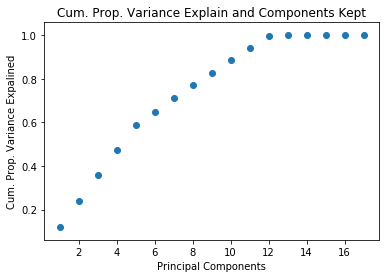

In [22]:
from matplotlib import pyplot as plt
# Find cumulative variance of each principle component
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)

# Show cumulative proportion of varaince with respect to components
print("Cumulative proportion of variance explained vector: \n%s" %var_comp_sum)

# x-axis for number of principal components kept
num_comp = range(1,len(eigvalues_sort)+1)

# Chart title
plt.title('Cum. Prop. Variance Explain and Components Kept')

# x-label
plt.xlabel('Principal Components')

# y-label
plt.ylabel('Cum. Prop. Variance Expalined')

# Scatter plot of cumulative variance explained and principal components kept
plt.scatter(num_comp, var_comp_sum)

# Show scattor plot
plt.show()

Um.. Can you see that? I think I can reduce the data to 10 or 11 features.

In [23]:
# Step 4: Project data onto 2d 

# Keep the first two principal components 
# P_reduce is 8 x 2 matrix
P_reduce = np.array(eigvectors_sort[0:2]).transpose()

# Let's project data onto 2D space
# The projected data in 2D will be n x 2 matrix
Proj_data_2D = np.dot(X_std,P_reduce)

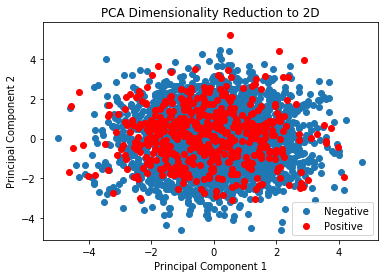

In [24]:
%matplotlib inline
# Visualize data in 2D

# Plot projected the data onto 2D (test negative for diabetes)
negative = plt.scatter(Proj_data_2D[:,0][y == 0], Proj_data_2D[:,1][y == 0])

# Plot projected the data onto 2D (test positive for diabetes)
positive = plt.scatter(Proj_data_2D[:,0][y == 1], Proj_data_2D[:,1][y == 1], color = "red")


# Chart title
plt.title('PCA Dimensionality Reduction to 2D')

# y-label
plt.ylabel('Principal Component 2')

# x-label
plt.xlabel('Principal Component 1')

# legend
plt.legend([negative,positive],["Negative", "Positive"])

# Show scatter plot
plt.show()

In [25]:
# Step 4: Project data onto 3d 

# Keep the first three principal components 
# P_reduce is k x 3 matrix
P_reduce = np.array(eigvectors_sort[0:3]).transpose()

# Let's project data onto 3D space
# The projected data in 3D will be n x 3 matrix
Proj_data_3D = np.dot(X_std,P_reduce)

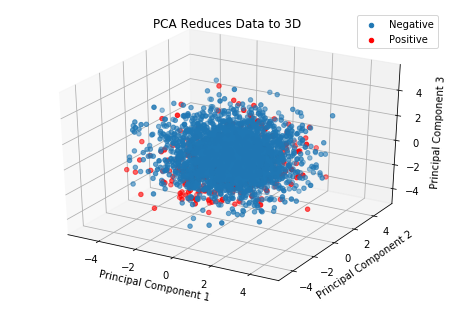

In [26]:
# Visualize data in 3D
from mpl_toolkits.mplot3d import Axes3D
# Define 3D figure
fig = plt.figure()
ax = Axes3D(fig)

# Scatter plot in 3D (test negative for churn)
negative = ax.scatter(Proj_data_3D[:,0][y == 0], Proj_data_3D[:,1][y == 0], Proj_data_3D[:,2][y == 0])

# Scatter plot in 3D (test positive for churn)
positive = ax.scatter(Proj_data_3D[:,0][y == 1], Proj_data_3D[:,1][y == 1], Proj_data_3D[:,2][y == 1], color = "red")

# Title 
ax.set_title('PCA Reduces Data to 3D')

# x-label 
ax.set_xlabel('Principal Component 1')

# y-label
ax.set_ylabel('Principal Component 2')

# z-label
ax.set_zlabel('Principal Component 3')

# legend
plt.legend([negative,positive],["Negative", "Positive"])

# Show 3D plot
plt.show()

### short cut(PCA) : with scikit-learn

In [27]:
X.shape

(3333, 17)

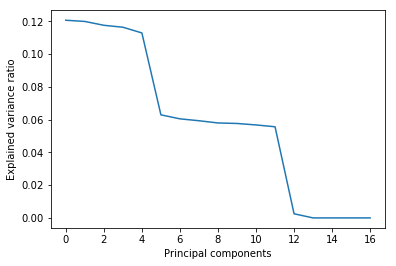

In [28]:
%matplotlib inline
#PCA In Sklearn
from sklearn.decomposition import PCA

pca_full = PCA(n_components = None)
pca_full.fit(X)

plt.plot(range(0,17), pca_full.explained_variance_ratio_)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
#plt.xticks(np.arange(0,100,5))
plt.show()

In [29]:
x_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components = 11)
x_pca = pca.fit_transform(x_scaled)
print(x_pca, end = '\n\n')
print(pca.explained_variance_ratio_)

[[ 1.89314448 -0.3419874  -1.1252648  ..., -0.35197984 -0.30564949
  -0.11465174]
 [-0.43319115 -0.26117814  0.81060346 ..., -0.77726165 -0.85409728
   0.15426344]
 [-1.49095131 -0.55313299 -2.70992111 ..., -0.12374307 -0.95597972
   0.21004733]
 ..., 
 [-0.39022136  2.05427482 -0.01832004 ...,  1.41339245  0.00558379
   0.73330735]
 [ 0.76780102 -0.15551399 -1.30045305 ..., -0.09318208  2.83925532
   1.66923053]
 [ 1.18817973  1.41276264 -0.33745347 ...,  0.75505857 -0.75592435
  -0.55132047]]

[ 0.12057334  0.11984227  0.11749278  0.11631771  0.11283401  0.06287193
  0.06043419  0.0592723   0.05791925  0.05760885  0.05671342]


In [30]:
sum(pca.explained_variance_ratio_)

0.94188004354976684

In [31]:
x_pca.shape

(3333, 11)

### Note:

From the above, I have concluded that It would be reasonable to use PCA to reduce the data to 11 features(dimentions) to speed up the algorithm with retaining over almost 94% of the original data variation when I decided to use classification algorithms to predict outcome.

## Building and run ML models


### Train and Test split

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=0)

In [33]:
# Normalizing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### LogisticRegression

In [34]:
from sklearn.linear_model import LogisticRegression
# Train the model
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
LR_model.score(X_test, y_test)

0.85757121439280359

In [36]:
from sklearn.metrics import roc_auc_score

# Predict the transformed test documents
predictions = LR_model.predict(X_test)

print('AUC:', roc_auc_score(y_test, predictions))

AUC: 0.556592479196


### K-Nearest Neighbors  - KNeighborsClassifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

In [38]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [39]:
knn.score(X_test, y_test)

0.90404797601199405

In [40]:
from sklearn.metrics import roc_auc_score


predictions = knn.predict(X_test)

print('AUC:', roc_auc_score(y_test, predictions))

AUC: 0.665273198304


### K-Nearest Neighbors - KNeighborsRegressor

In [41]:
from sklearn.neighbors import KNeighborsRegressor

knnreg = KNeighborsRegressor(n_neighbors = 5)

In [42]:
knnreg.fit(X_test, y_test)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [43]:
knnreg.score(X_test, y_test)

0.44233396137541203

In [44]:
from sklearn.metrics import roc_auc_score


predictions = knnreg.predict(X_test)

print('AUC:', roc_auc_score(y_test, predictions))

AUC: 0.949864578427


### Naive Bayes classifiers

In [45]:
from sklearn.naive_bayes import GaussianNB

nbclf = GaussianNB()

In [46]:
nbclf.fit(X_test, y_test)

GaussianNB(priors=None)

In [47]:
nbclf.score(X_test, y_test)

0.8860569715142429

In [48]:
from sklearn.metrics import roc_auc_score


predictions = nbclf.predict(X_test)

print('AUC:', roc_auc_score(y_test, predictions))

AUC: 0.659728764327


### Decision Trees

In [49]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 8,
                            random_state = 0)

In [50]:
clf.fit(X_test, y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=8,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [51]:
clf.score(X_test, y_test)

0.91004497751124436

In [52]:
from sklearn.metrics import roc_auc_score


predictions = clf.predict(X_test)

print('AUC:', roc_auc_score(y_test, predictions))

AUC: 0.741001334589


### Random Forests

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state = 0)
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

In [54]:
clf.score(X_test, y_test)

0.90554722638680663

In [55]:
from sklearn.metrics import roc_auc_score


predictions = clf.predict(X_test)

print('AUC:', roc_auc_score(y_test, predictions))

AUC: 0.70468283875


## Manual Neural Network

- Build the Neural Network

- Set the hyperparameters, train the NN and evaluate

- Adapt SGD method to improve the accuracy

- Shorcut with Scikit-learn



In [56]:
class MyNeuralNetwork(object):
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes =  input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.hidden_nodes,self.input_nodes))

        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                       (self.output_nodes, self.hidden_nodes))
        self.lr = learning_rate
        
        #### Set this to implemented sigmoid function ####
        # Activation function is the sigmoid function
        self.sigmoid_activation = lambda x : 1 / (1 + np.exp(-x))
        self.sigmoid_output_2_derivative = lambda x: x * (1 - x)
    
    def train(self, inputs_array, targets_array):
        # Convert inputs list to 2d array
        inputs  = inputs_array.T
        targets = np.array(targets_array, ndmin=2)
        #targets = targets_array
        m = inputs_array.shape[0] # number of records
        
        #### Implement the forward pass here ####
        ### Forward pass ###
        # Hidden layer
        layer_1_inputs = np.dot(self.weights_0_1, inputs) # signals into hidden layer
        layer_1 = layer_1_inputs # signals from hidden layer
        
        # Output layer
        layer_2_inputs = np.dot(self.weights_1_2,layer_1) # signals into final output layer
        layer_2 = self.sigmoid_activation(layer_2_inputs) # signals from final output layer
        
        #### Implement the backward pass here ####
        ### Backward pass ###
        
        # Output error  
        layer_2_errors = targets - layer_2  # Output layer error is the difference between desired target and actual output.
        layer_2_delta = layer_2_errors * self.sigmoid_output_2_derivative(layer_2)
        
        # Backpropagated error
        layer_1_errors = np.dot(self.weights_1_2.T,layer_2_delta) # errors propagated to the hidden layer 2x128
        layer_1_delta = layer_1_errors  # hidden layer gradients y = x -> 1
        
        #  Update the weights
        self.weights_1_2 += self.lr*np.dot(layer_2_delta,layer_1.T)/m # update hidden-to-output weights with gradient descent step
        self.weights_0_1 += self.lr*np.dot(layer_1_delta,inputs.T)/m # update input-to-hidden weights with gradient descent step
         
        
    def run(self, inputs_list):
        # Run a forward pass through the network
        inputs = np.array(inputs_list, ndmin=2).T
        
        #### Implement the forward pass here ####
        #  Hidden layer
        hidden_inputs = np.dot(self.weights_0_1, inputs) # signals into hidden layer
        hidden_outputs = hidden_inputs # signals from hidden layer
        
        # Output layer
        final_inputs = np.dot(self.weights_1_2,hidden_outputs) # signals into final output layer
        final_outputs = self.sigmoid_activation(final_inputs) # signals from final output layer 
        
        return final_outputs

### Train the model 

In [57]:
from sklearn import metrics
### Set the hyperparameters here ###
epochs = 100 #100
learning_rate = 0.01 #0.1
hidden_nodes = 10 
output_nodes = 1

N_i = X_train.shape[1]
network = MyNeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

for e in range(epochs):
    network.train(X_train, y_train)
    
y_pred = network.run(X_test)
y_pred = np.where(y_pred >= 0.5, 1, 0) 
print(metrics.accuracy_score(y_test,y_pred[0]))

0.587706146927


### SGD

In [58]:

network = MyNeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

random_row_idx = np.zeros(128)
for e in range(epochs):
    random_row_idx = np.random.choice(X_train.shape[0],size=128)
    X_batch = X_train[random_row_idx,:]
    y_batch = y_train[random_row_idx]
    network.train(X_batch, y_batch)

In [59]:
y_pred = network.run(X_test)
y_pred = np.where(y_pred >= 0.5, 1, 0) # if probability >= 0.5, it is 1, else 0
print(metrics.accuracy_score(y_test,y_pred[0]))

0.581709145427


#### Oops! What went wrong? SGD is supposed to improve the accuracy dramatically. but the output is very disappointed though.   

### Short cut with Scikit-learn

In [60]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler



clf = MLPClassifier(hidden_layer_sizes = [100, 100], alpha = 5.0,
                   random_state = 0, solver='lbfgs')


In [61]:
clf.fit(X_test, y_test)

MLPClassifier(activation='relu', alpha=5.0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[100, 100], learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [62]:
clf.score(X_test, y_test)

0.992503748125937

## Swiching gear 

#### I now switch gears and use Neural Networks to perform customer churn analysis in Keras and Tensorflow.

### Building the model architecture

In [63]:
from keras.models import Sequential
from keras.layers import Dense
import keras

# fixing random seed
np.random.seed(0)

# create model
model = Sequential()
model.add(Dense(12, input_dim=11, activation='relu'))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# build model using keras documentation recommended optimizer initialization
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
# compile model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])



Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 11)                143       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 12        
Total params: 299.0
Trainable params: 299
Non-trainable params: 0.0
_________________________________________________________________


In [64]:
model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=0)

In [65]:
scores = model.evaluate(X_train, y_train)

  32/2666 [..............................] - ETA: 0s

In [66]:
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


acc: 94.75%


In [67]:
# generate predictions for training
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [68]:
train_predict

array([[ 0.07918099],
       [ 0.14507121],
       [ 0.04070739],
       ..., 
       [ 0.77293235],
       [ 0.00890751],
       [ 0.97042042]], dtype=float32)

In [69]:
test_predict 

array([[  3.03839177e-01],
       [  3.14858966e-02],
       [  2.44855471e-02],
       [  9.30703618e-03],
       [  9.99760330e-01],
       [  7.20367372e-01],
       [  1.24005981e-01],
       [  2.84535065e-03],
       [  5.50632514e-02],
       [  5.07938825e-02],
       [  1.84297431e-02],
       [  8.30210466e-03],
       [  1.59235317e-02],
       [  2.66290898e-03],
       [  8.89520288e-01],
       [  1.69486806e-01],
       [  1.41674709e-02],
       [  1.33250833e-01],
       [  8.83367099e-03],
       [  6.87568821e-03],
       [  5.63144833e-02],
       [  1.05786510e-02],
       [  1.51684564e-02],
       [  5.00312215e-03],
       [  7.68503770e-02],
       [  1.32635804e-02],
       [  4.81993929e-02],
       [  1.55460266e-02],
       [  4.12505604e-02],
       [  1.58314019e-01],
       [  1.85905565e-02],
       [  2.00992636e-02],
       [  2.58088727e-02],
       [  9.78285447e-03],
       [  1.01265637e-02],
       [  6.60141278e-03],
       [  9.60516214e-01],
 

In [70]:
# print out training and testing errors
training_error = model.evaluate(X_train, y_train, verbose=0)
print('training error = ' + str(training_error))

testing_error = model.evaluate(X_test, y_test, verbose=0)
print('testing error = ' + str(testing_error))

training error = [0.16445033505994935, 0.9474868716285002]
testing error = [0.2163155609923324, 0.93103448365224351]


### Tensorflow

In [71]:
import tensorflow as tf
# Build one layer DNN with 40 units respectively.
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns, hidden_units=[40], n_classes=2)

# Fit and predict.
classifier.fit(X_train, y_train, steps=300)
predictions = list(classifier.predict(X_test, as_iterable=True))
score = metrics.accuracy_score(y_test, predictions)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f5527b803c8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': None}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving 

/home/suh/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py:248: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpzfqdaxd6/model.ckpt.
INFO:tensorflow:loss = 0.657322, step = 1
INFO:tensorflow:global_step/sec: 181.456
INFO:tensorflow:loss = 0.328623, step = 101 (0.552 sec)
INFO:tensorflow:global_step/sec: 175.45
INFO:tensorflow:loss = 0.28894, step = 201 (0.570 sec)
INFO:tensorflow:Saving checkpoints for 300 into /tmp/tmpzfqdaxd6/model.ckpt.
INFO:tensorflow:Loss for final step: 0.259434.
Instructions for updating:
Please switch to predict_classes, or set `outputs` argument.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Restoring parameters from /tmp/tmpzfqdaxd6/model.ckpt-300


In [72]:
print('TF Accuracy:', score)

TF Accuracy: 0.904047976012


## Summary

- LogisticRegression : 0.85757121439280359
    
- K-Nearest Neighbors - KNeighborsClassifier : 0.90404797601199405
    
- K-Nearest Neighbors - KNeighborsRegressor : 0.44233396137541203
    
- Naive Bayes classifiers : 0.8860569715142429
    
- Decision Trees : 0.91004497751124436
    
- Random Forests : 0.90554722638680663
    
- Manual Neural Network : 0.584707646177
    
- Neural Network in Scikit-learn : 0.992503748125937
    
- Keras acc : 94.64%
    
- TF Accuracy : 0.901049475262
    

    


## PART 2. Evaluation

In [73]:
# Creating a dataset with imbalanced binary classes:  
# Negative class (0) is 'not digit 1' 
# Positive class (1) is 'digit 1'
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])

Original labels:	 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
New binary labels:	 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [74]:
np.bincount(y_binary_imbalanced)    # Negative class (0) is the most frequent class

array([2850,  483])

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.92685851318944845

## Dummy Classifiers

DummyClassifier is a classifier that makes predictions using simple rules, which can be useful as a baseline for comparison against actual classifiers, especially with imbalanced classes.

In [76]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [77]:
dummy_majority.score(X_test, y_test)

0.86211031175059949

In [78]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.86211031175059949

## Confusion matrices


Binary (two-class) confusion matrix

In [79]:
from sklearn.metrics import confusion_matrix

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', confusion)

Most frequent class (dummy classifier)
 [[719   0]
 [115   0]]


In [80]:
# produces random predictions w/ same class proportion as training set
dummy_classprop = DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print('Random class-proportional prediction (dummy classifier)\n', confusion)

Random class-proportional prediction (dummy classifier)
 [[599 120]
 [104  11]]


In [81]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel, C=1)\n', confusion)

Support vector machine classifier (linear kernel, C=1)
 [[719   0]
 [115   0]]


In [82]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic regression classifier (default settings)\n', confusion)

Logistic regression classifier (default settings)
 [[700  19]
 [ 93  22]]


In [83]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)

Decision tree classifier (max_depth = 2)
 [[671  48]
 [ 58  57]]


## Evaluation metrics for binary classification

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted)))

Accuracy: 0.87
Precision: 0.54
Recall: 0.50
F1: 0.52


In [85]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_predicted, target_names=['not 1', '1']))

             precision    recall  f1-score   support

      not 1       0.92      0.93      0.93       719
          1       0.54      0.50      0.52       115

avg / total       0.87      0.87      0.87       834



In [86]:
print('Random class-proportional (dummy)\n', 
      classification_report(y_test, y_classprop_predicted, target_names=['not 1', '1']))
print('SVM\n', 
      classification_report(y_test, svm_predicted, target_names = ['not 1', '1']))
print('Logistic regression\n', 
      classification_report(y_test, lr_predicted, target_names = ['not 1', '1']))
print('Decision tree\n', 
      classification_report(y_test, tree_predicted, target_names = ['not 1', '1']))

Random class-proportional (dummy)
              precision    recall  f1-score   support

      not 1       0.85      0.83      0.84       719
          1       0.08      0.10      0.09       115

avg / total       0.75      0.73      0.74       834

SVM
              precision    recall  f1-score   support

      not 1       0.86      1.00      0.93       719
          1       0.00      0.00      0.00       115

avg / total       0.74      0.86      0.80       834

Logistic regression
              precision    recall  f1-score   support

      not 1       0.88      0.97      0.93       719
          1       0.54      0.19      0.28       115

avg / total       0.83      0.87      0.84       834

Decision tree
              precision    recall  f1-score   support

      not 1       0.92      0.93      0.93       719
          1       0.54      0.50      0.52       115

avg / total       0.87      0.87      0.87       834



/home/suh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

# show the decision_function scores for first 20 instances
y_score_list

[(0, -0.35922544704334403),
 (0, -3.7323227657460532),
 (0, -0.77388071841989081),
 (0, -2.8407368879094639),
 (1, 1.6110848302407388),
 (1, 0.83317299535290923),
 (1, -0.47954398270752896),
 (0, -2.9495418637014934),
 (0, -1.7838681201333568),
 (0, -0.48210211219701016),
 (0, -3.0611665956056942),
 (0, -2.4170004900187378),
 (0, -2.1819175412057721),
 (0, -4.9295327175755972),
 (1, -1.1318048583880793),
 (0, -1.009291128645635),
 (0, -2.1100758669055097),
 (0, -1.6360379576997162),
 (0, -2.1282545676217732),
 (0, -2.8799285909984005)]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1]))

# show the probability of positive class for first 20 instances
y_proba_list

[(0, 0.41114707629316616),
 (0, 0.023377577703215937),
 (0, 0.31564022743492104),
 (0, 0.055162119138847422),
 (1, 0.83356194636362546),
 (1, 0.69702542470295503),
 (1, 0.38235981285426651),
 (0, 0.049758168825798442),
 (0, 0.14382615648160274),
 (0, 0.38175586506309556),
 (0, 0.044737820526782227),
 (0, 0.081885476730592183),
 (0, 0.10138609297787901),
 (0, 0.0071779849125001155),
 (1, 0.24382817450315009),
 (0, 0.26711860093963496),
 (0, 0.10812135061350898),
 (0, 0.16300489956704795),
 (0, 0.10638080537391427),
 (0, 0.053154730248800998)]

## Precision-recall curves

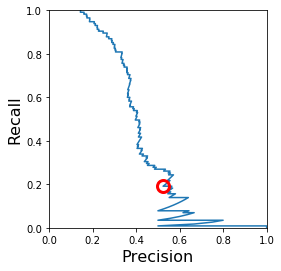

In [89]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

## ROC curves, Area-Under-Curve (AUC)

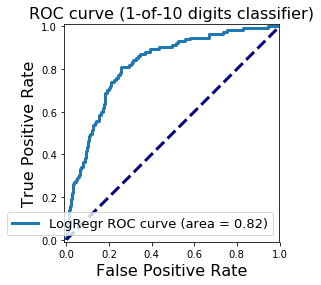

In [90]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

gamma = 0.01  accuracy = 0.89   AUC = 0.90
gamma = 0.10  accuracy = 0.92   AUC = 0.92
gamma = 0.20  accuracy = 0.90   AUC = 0.91
gamma = 1.00  accuracy = 0.86   AUC = 0.83


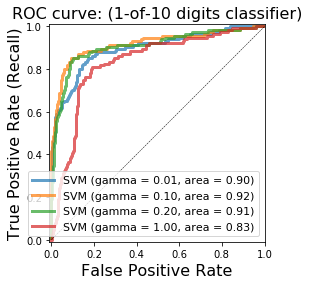

In [91]:
from matplotlib import cm

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()

In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC


clf = SVC(kernel='linear', C=1)

# accuracy is the default scoring metric
print('Cross-validation (accuracy)', cross_val_score(clf, X, y, cv=5))
# use AUC as scoring metric
print('Cross-validation (AUC)', cross_val_score(clf, X, y, cv=5, scoring = 'roc_auc'))
# use recall as scoring metric
print('Cross-validation (recall)', cross_val_score(clf, X, y, cv=5, scoring = 'recall'))

Cross-validation (accuracy) [ 0.85457271  0.85457271  0.85457271  0.85585586  0.85585586]
Cross-validation (AUC) [ 0.70728884  0.65977573  0.75831073  0.62192982  0.5942617 ]
Cross-validation (recall) [ 0.  0.  0.  0.  0.]


## Grid search

In [93]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = SVC(kernel='rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)

Grid best parameter (max. accuracy):  {'gamma': 0.05}
Grid best score (accuracy):  0.910764305722
Test set AUC:  0.91998548709
Grid best parameter (max. AUC):  {'gamma': 0.05}
Grid best score (AUC):  0.89632728614


In [94]:
from sklearn.metrics.scorer import SCORERS

print(sorted(list(SCORERS.keys())))

['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'log_loss', 'mean_absolute_error', 'mean_squared_error', 'median_absolute_error', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc']


# Conclusion

##### All methodology(except PCA) used in this notebook is supervised learning approach because, data set the above is some quality tagged training data.
##### So, a question raised here, what if you do not have enough quality labelled training data. You guys BNK has enough those tagging data?
#### In practice, getting those labelled data is not easy and it is quite expensive and time consuming process.

##### In Customer Churn Prediction problem(assuming this scenario that we know how much money they withdraw or deposit into it this month and in this case, can we predict if they will continue using the app next month or not?), If you do not have a quality labelled data, You can use unsepervised learnig algorithm like GMM (gaussian mixture model) to extract any meaningful data patterns instead.